### Importação das bibliotecas

In [1]:
# Biblioteca Pandas - Manipulação de dados
import pandas as pd
# Biblioteca Seaborn - Criação de gráficos
import seaborn as sns
# Biblioteca Matplotlib - Criação de gráficos
import matplotlib.pyplot as plt

# OPCIONAL - Biblioteca para ignorar mensagens de warning (aviso) ao rodar uma célula de código
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Métricas de avaliação dos modelos
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
warnings.filterwarnings('ignore')

### Importação das dos dados

In [2]:
# Função read_csv para importar os dados da pasta do computador
dados = pd.read_csv('precos_carros_brasil.csv')

### Análise Exploratória dos Dados (AED)

In [3]:
# Imprimindo as 5 primeiras linhas
dados.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.0,9162.0
1,2021.0,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.0,8832.0
2,2021.0,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.0,8388.0
3,2021.0,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000.0,8453.0
4,2021.0,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001.0,12525.0


#### b. Verifique se há valores faltantes nos dados. Caso haja, escolha uma tratativa para resolver o problema de valores faltantes

In [4]:
# Verificando se existem valores faltantes nos dados 
dados.isna().any()

year_of_reference     True
month_of_reference    True
fipe_code             True
authentication        True
brand                 True
model                 True
fuel                  True
gear                  True
engine_size           True
year_model            True
avg_price_brl         True
dtype: bool

In [5]:
# Verificando a quantidade de valores faltantes por coluna
dados.isna().sum()

year_of_reference     65245
month_of_reference    65245
fipe_code             65245
authentication        65245
brand                 65245
model                 65245
fuel                  65245
gear                  65245
engine_size           65245
year_model            65245
avg_price_brl         65245
dtype: int64

In [6]:
# verificando se há linhas inteiramente vazias e quantas existem
dados.isnull().all(axis=1).sum()

65245

In [7]:
# Removendo linhas vazias
dados.dropna(axis=0, how='all', inplace=True)

In [8]:
# verificando se sobrou linhas vazias
dados.isnull().all(axis=1).sum()

0

In [9]:
# verificando novamente a quantidade de valores faltantes por coluna
dados.isna().sum()

year_of_reference     0
month_of_reference    0
fipe_code             0
authentication        0
brand                 0
model                 0
fuel                  0
gear                  0
engine_size           0
year_model            0
avg_price_brl         0
dtype: int64

#### c. Verifique se há dados duplicados nos dados

In [10]:
# Verificando se há dados duplicados
dados.duplicated().sum()

2

In [11]:
# Removendo dados duplicados
dados.drop_duplicates(inplace=True)

In [12]:
# Verificando se ainda há dados duplicados
dados.duplicated().sum()

0

#### d. Crie duas categorias, para separar colunas numéricas e categóricas. Imprima o resumo de informações das variáveis numéricas e categóricas (estatística descritiva dos dados)

In [13]:
dados['year_of_reference'] = pd.to_numeric(dados['year_of_reference'], errors='coerce').astype('Int64')
dados['engine_size'] = dados['engine_size'].str.replace(',', '.').astype(float)
dados['year_model'] = pd.to_numeric(dados['year_model'], errors='coerce').astype('Int64')
dados['avg_price_brl'] = pd.to_numeric(dados['avg_price_brl'], errors='coerce')


In [14]:
dados.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2002,9162.0
1,2021,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2001,8832.0
2,2021,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2000,8388.0
3,2021,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1.0,2000,8453.0
4,2021,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,1.6,2001,12525.0


In [15]:
numericas_cols = [col for col in dados.columns if dados[col].dtype != 'object']
categoricas_cols = [col for col in dados.columns if dados[col].dtype == 'object']

In [16]:
# Resumo das variáveis numéricas - Imprime alguns valores de medidas de tendências centrais 
dados[numericas_cols].describe()

,year_of_reference,engine_size,year_model,avg_price_brl
count,202295.0,202295.000000,202295.0,202295.000000
mean,2021.564695,1.822302,2011.271514,52756.765713
std,0.571904,0.734432,6.376241,51628.912116
min,2021.0,1.000000,2000.0,6647.000000
25%,2021.0,1.400000,2006.0,22855.000000
50%,2022.0,1.600000,2012.0,38027.000000
75%,2022.0,2.000000,2016.0,64064.000000
max,2023.0,6.200000,2023.0,979358.000000


# 2 Visualização de dados


In [17]:
# Número de carros por marca
carros_por_marca = dados['brand'].value_counts()
print(carros_por_marca)

brand
Fiat               44962
VW - VolksWagen    44312
GM - Chevrolet     38590
Ford               33150
Renault            29191
Nissan             12090
Name: count, dtype: int64


[Text(0, 0, '44962'),
 Text(0, 0, '44312'),
 Text(0, 0, '38590'),
 Text(0, 0, '33150'),
 Text(0, 0, '29191'),
 Text(0, 0, '12090')]

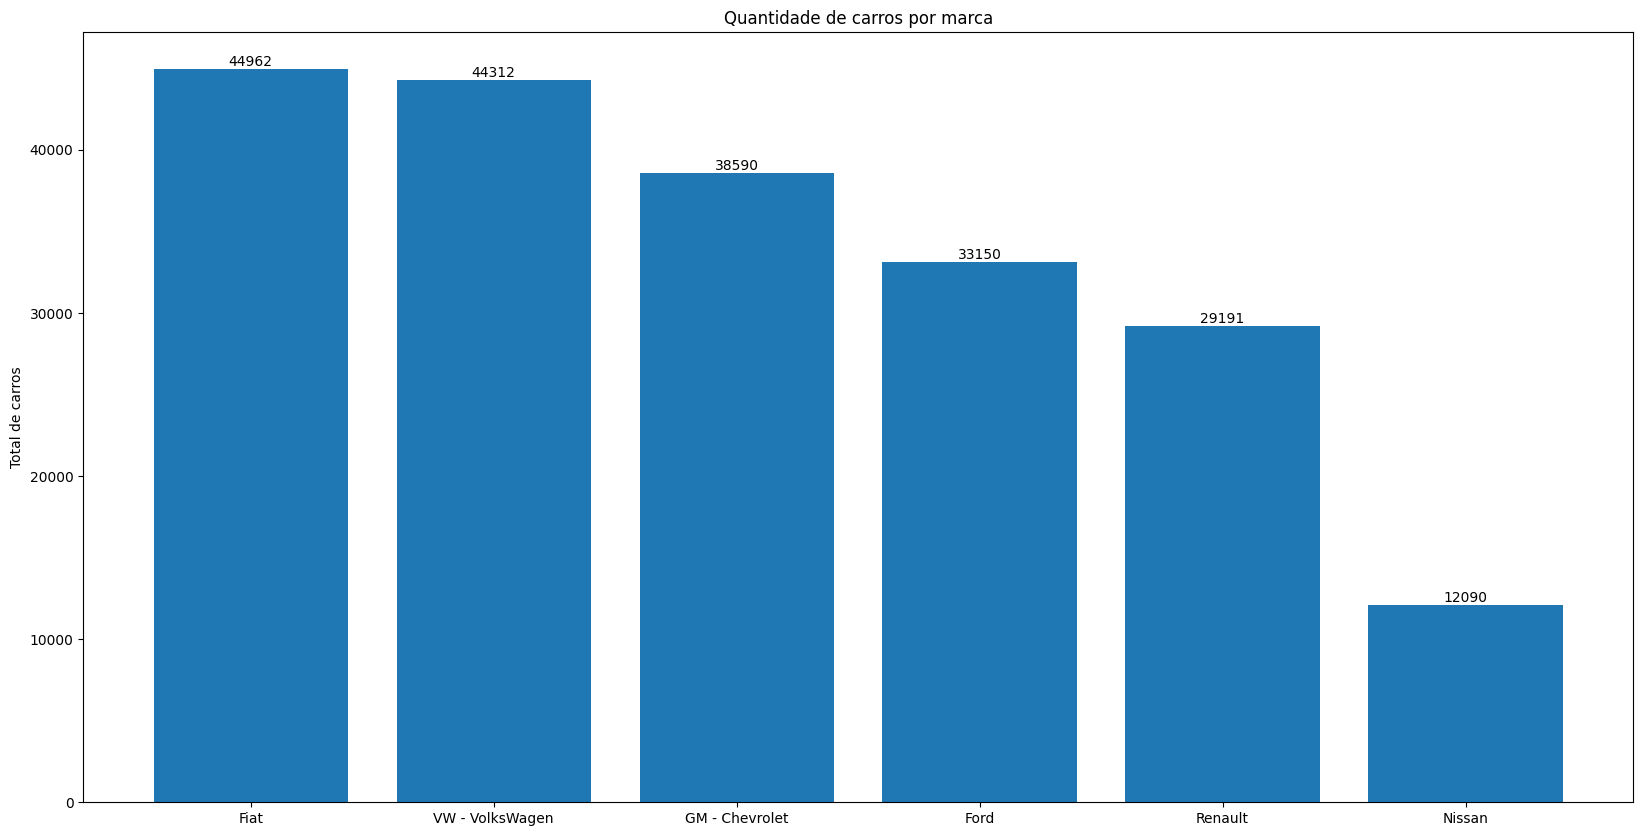

In [18]:
# Gráfico da distribuição da quantidade de carros por marca
plt.figure(figsize=(20,10))
grafico_marcas = plt.bar(carros_por_marca.index, carros_por_marca.values)
plt.title('Quantidade de carros por marca')
plt.ylabel('Total de carros')
plt.bar_label(grafico_marcas, size=10)


#### b. Gere um gráfico da distribuição da quantidade de carros por tipo de engrenagem do carro

In [19]:
carros_por_engrenagem = dados['gear'].value_counts()
print(carros_por_engrenagem)

gear
manual       161883
automatic     40412
Name: count, dtype: int64


[Text(0, 0, '161883'), Text(0, 0, '40412')]

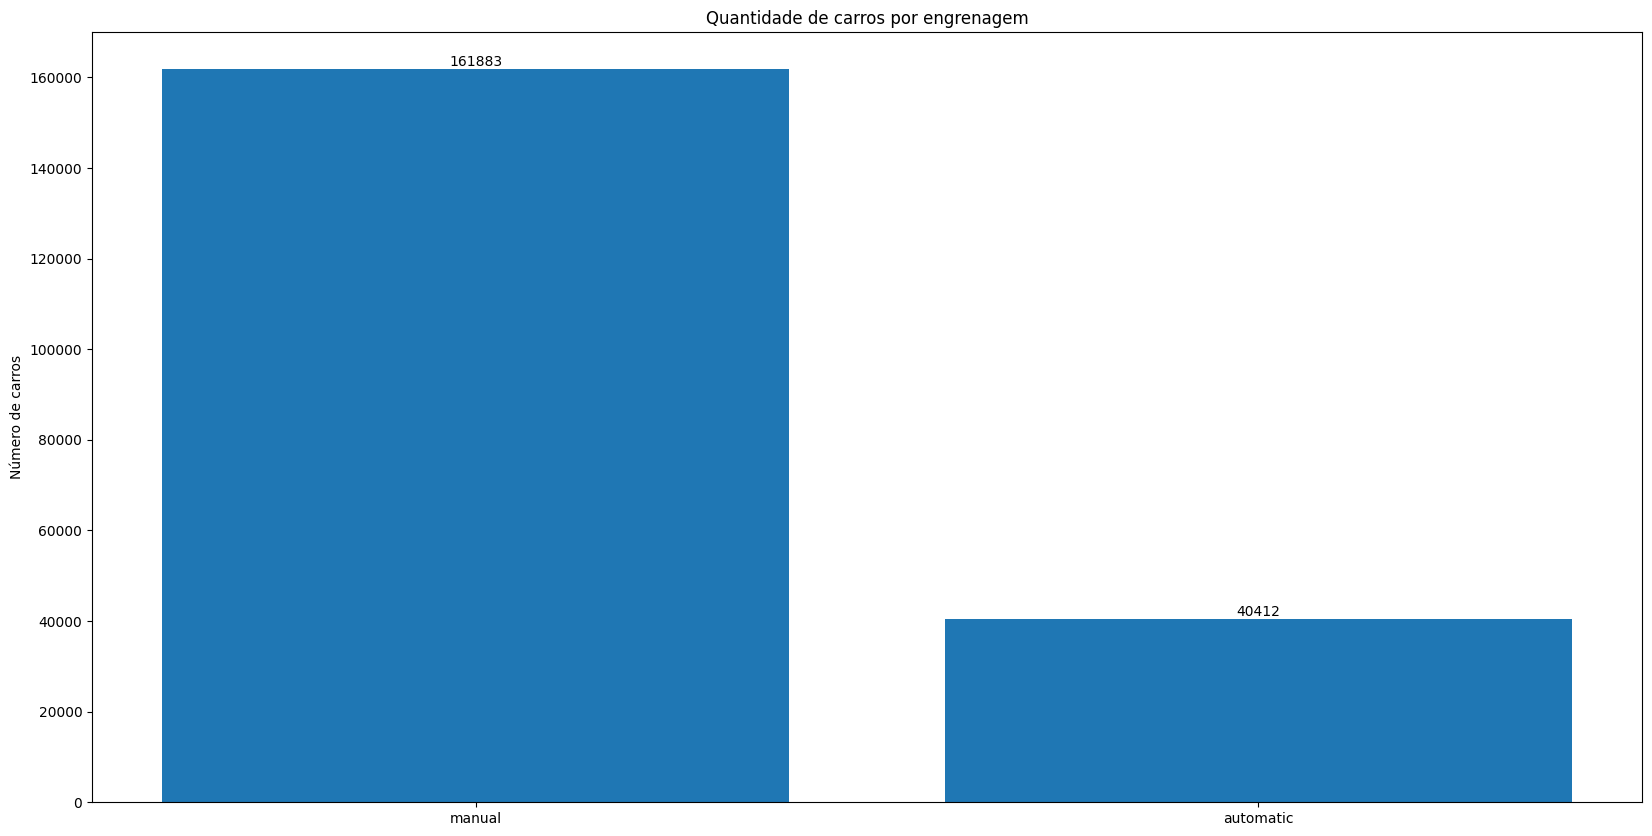

In [20]:
plt.figure(figsize=(20,10)) 
grafico_eng = plt.bar(carros_por_engrenagem.index, carros_por_engrenagem.values) 
plt.title('Quantidade de carros por engrenagem') 
plt.ylabel('Número de carros')
plt.bar_label(grafico_eng, size=10)

#### c. Gere um gráfico da evolução da média de preço dos carros ao longo dos meses de 2022 (variável de tempo no eixo X)


In [21]:
carros_2022 = dados[dados['year_of_reference'] == 2022]
carros_2022.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
96280,2022,January,004001-0,gzw0hkct8cj4,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2002,12330.0
96281,2022,January,004001-0,gm2ws5yqjnfx,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2001,11408.0
96282,2022,January,004001-0,gbvgy7432kp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2000,10620.0
96283,2022,January,004001-0,gvx412fg8v0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1.0,2000,11992.0
96284,2022,January,004003-7,jtskpmg524fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,1.6,2001,17182.0


In [22]:
# definindo ordem dos meses
ordem_dos_meses = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [23]:
#Agrumar qunatidade por mes
carros_2022['month_of_reference'] = pd.Categorical(carros_2022['month_of_reference'], categories=ordem_dos_meses, ordered=True)
carros_2022_media = carros_2022.groupby(['month_of_reference'])['avg_price_brl'].mean().round(0)
carros_2022_media.head()



month_of_reference
January     54840.0
February    55825.0
March       56849.0
April       57150.0
May         57800.0
Name: avg_price_brl, dtype: float64

In [24]:
carros_2022_media = carros_2022_media.reset_index(name='average_price')
carros_2022_media.head()

,month_of_reference,average_price
0,January,54840.0
1,February,55825.0
2,March,56849.0
3,April,57150.0
4,May,57800.0


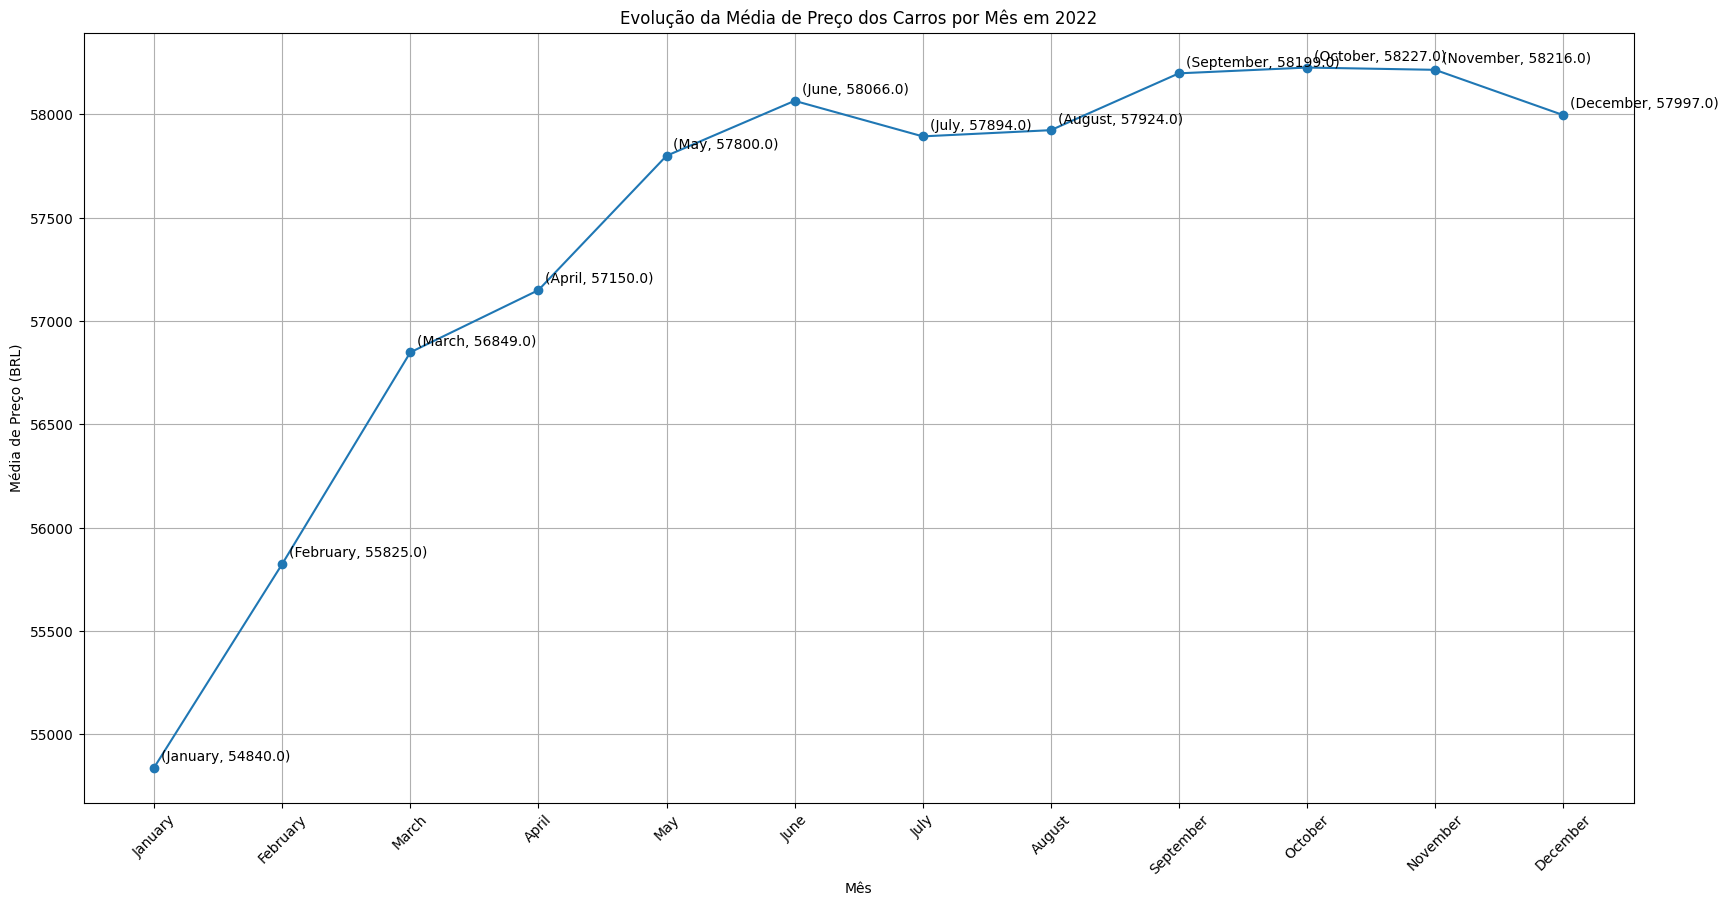

In [25]:
plt.figure(figsize=(20, 10))
plt.plot(carros_2022_media['month_of_reference'], carros_2022_media['average_price'], marker='o')

for index, row in carros_2022_media.iterrows():
  plt.annotate(f'({row["month_of_reference"]}, {row["average_price"]})', xy=(row["month_of_reference"], row["average_price"]), xytext=(5, 5), textcoords='offset points')
plt.title('Evolução da Média de Preço dos Carros por Mês em 2022')
plt.xlabel('Mês')
plt.ylabel('Média de Preço (BRL)')
plt.xticks(carros_2022_media.index, ordem_dos_meses, rotation=45)
plt.grid(True)

#### d. Gere um gráfico da distribuição da média de preço dos carros por marca e tipo de engrenagem

In [26]:
carros_media_preco_marca_eng = dados.groupby(['brand', 'gear'])['avg_price_brl'].mean().round(0)
carros_media_preco_marca_eng = carros_media_preco_marca_eng.reset_index(name='average_price')
carros_media_preco_marca_eng.head()

,brand,gear,average_price
0,Fiat,automatic,97397.0
1,Fiat,manual,39694.0
2,Ford,automatic,84769.0
3,Ford,manual,51784.0
4,GM - Chevrolet,automatic,88157.0


<Axes: xlabel='gear', ylabel='average_price'>

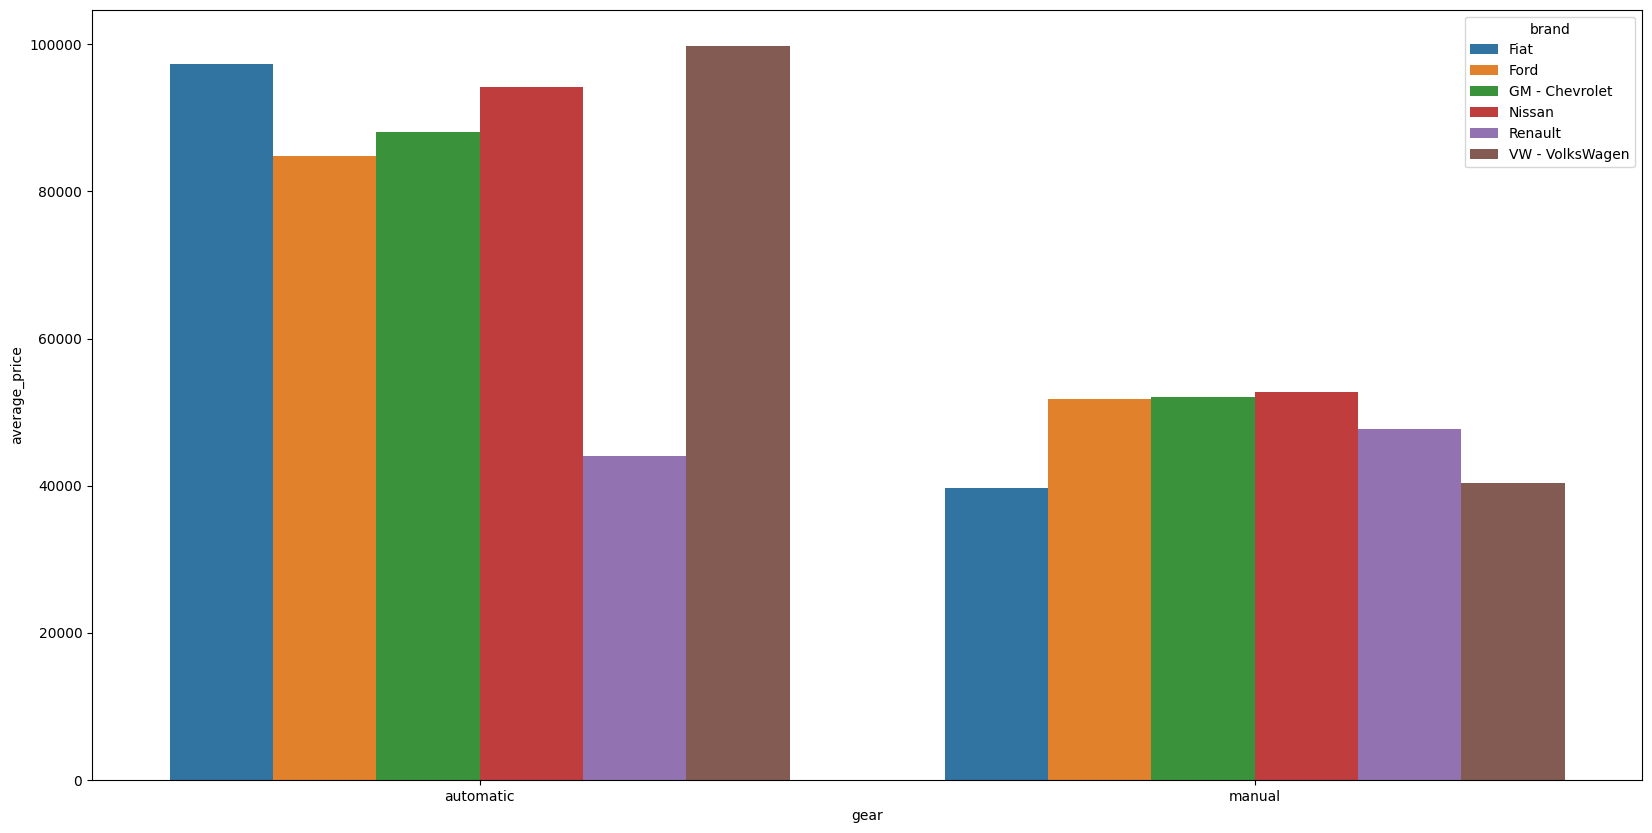

In [27]:
plt.figure(figsize=(20,10))
sns.barplot(
  x='gear', 
  y='average_price', 
  hue='brand', 
  data=carros_media_preco_marca_eng, 
  hue_order=carros_media_preco_marca_eng['brand'].unique()
)

#### f. Gere um gráfico da distribuição da média de preço dos carros por marca e tipo de combustível


In [28]:
carros_media_preco_marca_combustivel = dados.groupby(['brand', 'fuel'])['avg_price_brl'].mean().round(0)
carros_media_preco_marca_combustivel = carros_media_preco_marca_combustivel.reset_index(name='average_price')
carros_media_preco_marca_combustivel.head()

,brand,fuel,average_price
0,Fiat,Alcohol,11510.0
1,Fiat,Diesel,99814.0
2,Fiat,Gasoline,37197.0
3,Ford,Alcohol,10149.0
4,Ford,Diesel,94526.0


Text(0.5, 1.0, 'Média de Preços dos Carros por Marca e Tipo de Combustível')

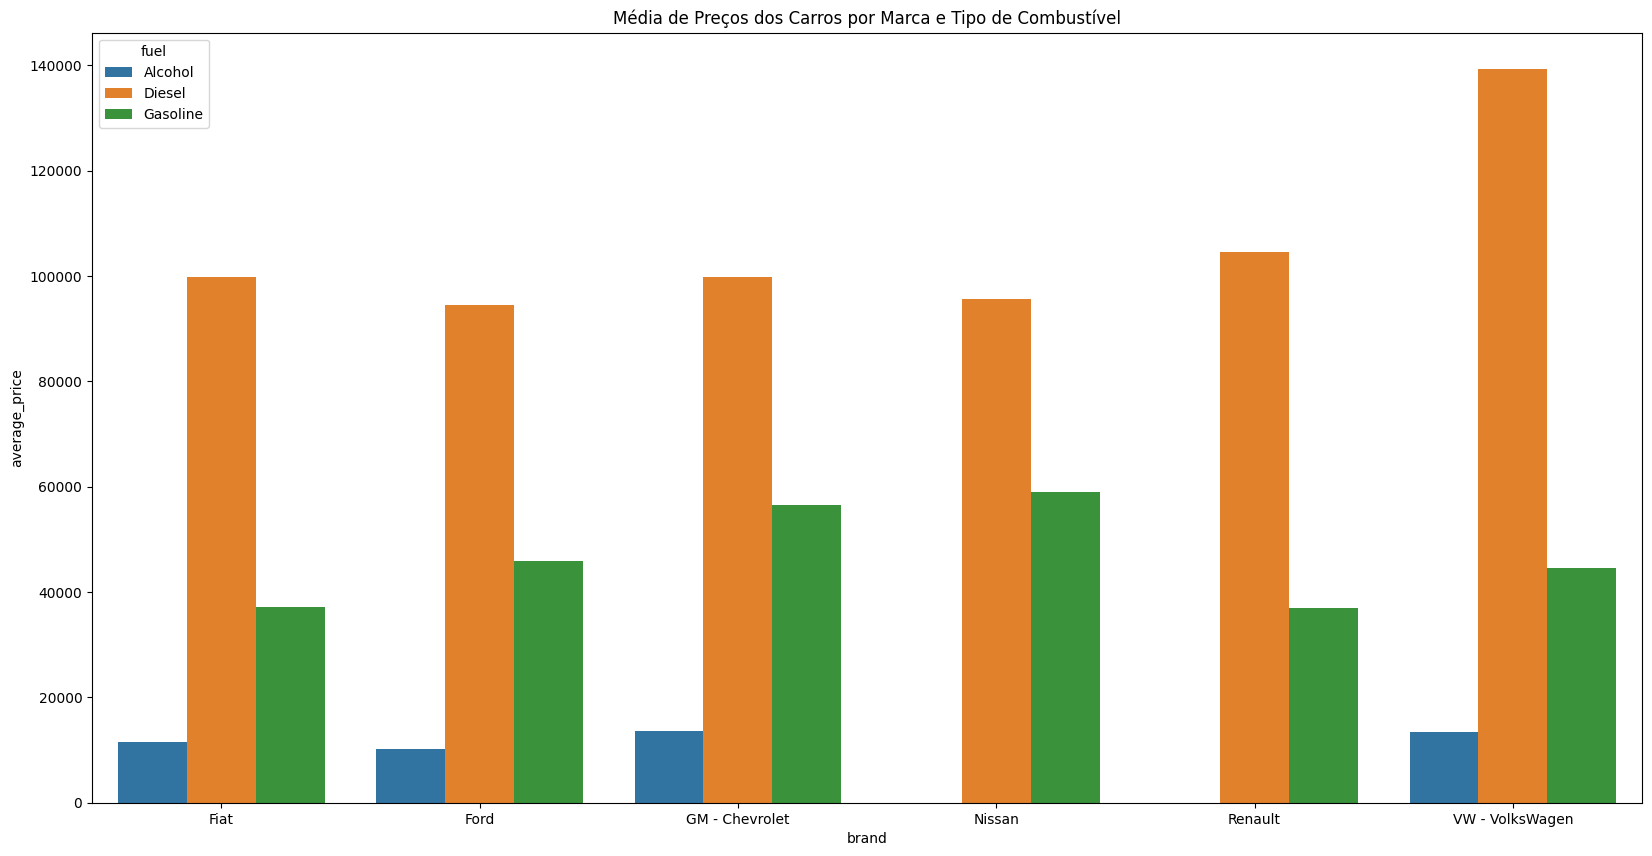

In [29]:
plt.figure(figsize=(20, 10))
sns.barplot(
  x='brand', 
  y='average_price',
  hue='fuel',
  data=carros_media_preco_marca_combustivel,
  hue_order=carros_media_preco_marca_combustivel['fuel'].unique()
)
plt.title('Média de Preços dos Carros por Marca e Tipo de Combustível')

# 3 Aplicação de modelos de machine learning para prever o preço médio dos carros


a. Escolha as variáveis numéricas (modelos de Regressão) para serem as variáveis independentes do modelo

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2002,9162.0
1,2021,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2001,8832.0
2,2021,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2000,8388.0
3,2021,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1.0,2000,8453.0
4,2021,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,1.6,2001,12525.0


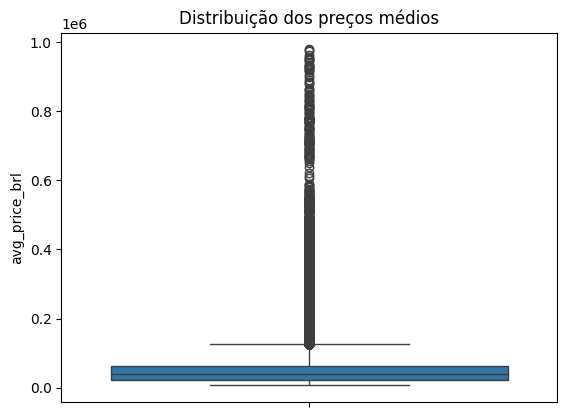

In [30]:
sns.boxplot(dados['avg_price_brl']).set_title('Distribuição dos preços médios')
dados.head()

In [31]:
# Transformar variaveis em numericas

dados['month_of_reference'] = LabelEncoder().fit_transform(dados['month_of_reference']) 
dados['brand'] = LabelEncoder().fit_transform(dados['brand'])
dados['model'] = LabelEncoder().fit_transform(dados['model'])
dados['fuel'] = LabelEncoder().fit_transform(dados['fuel'])
dados['gear'] = LabelEncoder().fit_transform(dados['gear'])
dados.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021,4,004001-0,cfzlctzfwrcp,2,297,2,1,1.0,2002,9162.0
1,2021,4,004001-0,cdqwxwpw3y2p,2,297,2,1,1.0,2001,8832.0
2,2021,4,004001-0,cb1t3xwwj1xp,2,297,2,1,1.0,2000,8388.0
3,2021,4,004001-0,cb9gct6j65r0,2,297,0,1,1.0,2000,8453.0
4,2021,4,004003-7,g15wg0gbz1fx,2,260,2,1,1.6,2001,12525.0


In [32]:
# Variável dados_num contém apenas variáveis numéricas de interesse (exclui o restante)
dados_num = dados.drop([
  'fipe_code',
  'authentication',
  ], axis=1
)
dados_num.head()

,year_of_reference,month_of_reference,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021,4,2,297,2,1,1.0,2002,9162.0
1,2021,4,2,297,2,1,1.0,2001,8832.0
2,2021,4,2,297,2,1,1.0,2000,8388.0
3,2021,4,2,297,0,1,1.0,2000,8453.0
4,2021,4,2,260,2,1,1.6,2001,12525.0


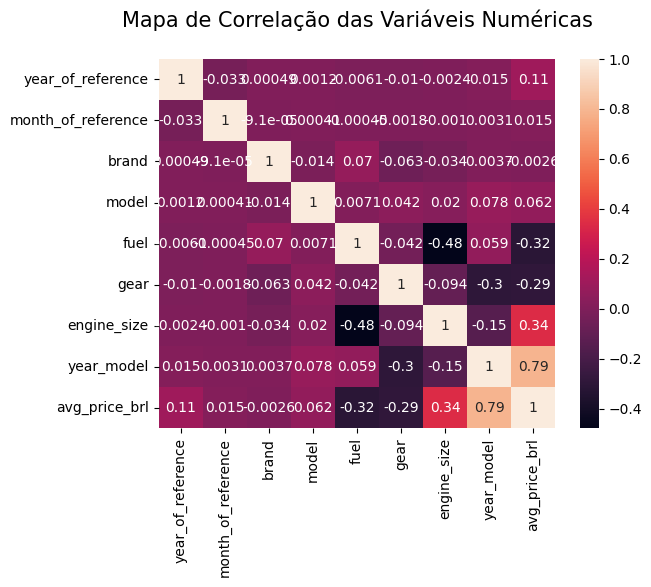

In [33]:
# Mapa de correlação das variáveis numéricas com variável Target
sns.heatmap(dados_num.corr("spearman"), annot = True)
plt.title("Mapa de Correlação das Variáveis Numéricas\n", fontsize = 15)
plt.show()

In [34]:
# Variável X contém apenas variáveis numéricas de interesse para a análise, excluindo a variável target
X = dados_num.drop(['avg_price_brl'], axis=1)
X.head()

,year_of_reference,month_of_reference,brand,model,fuel,gear,engine_size,year_model
0,2021,4,2,297,2,1,1.0,2002
1,2021,4,2,297,2,1,1.0,2001
2,2021,4,2,297,2,1,1.0,2000
3,2021,4,2,297,0,1,1.0,2000
4,2021,4,2,260,2,1,1.6,2001


In [35]:
# Variável Y contém apenas a variável target - avg_price_brl
Y = dados_num['avg_price_brl']
Y.head()

0     9162.0
1     8832.0
2     8388.0
3     8453.0
4    12525.0
Name: avg_price_brl, dtype: float64

#### b. Crie partições contendo 75% dos dados para treino e 25% para teste


In [36]:
# Divisão: 25% dos dados são de teste e 75% de treinamento
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [37]:
# Observando os dados de treinamento
print(X_train.shape)
X_train.head(1)

(151721, 8)


,year_of_reference,month_of_reference,brand,model,fuel,gear,engine_size,year_model
156364,2022,1,0,364,1,1,2.3,2020


In [38]:
# Observando os dados de teste
print(x_test.shape)
y_test.head(1)

(50574, 8)


180633    42595.0
Name: avg_price_brl, dtype: float64

In [39]:
# Observando a variável target
y_test.head()

180633    42595.0
13130     10989.0
163315     9087.0
121464    26965.0
14044     57102.0
Name: avg_price_brl, dtype: float64

#### c. Treine modelos RandomForest (biblioteca RandomForestRegressor) e XGBoost (biblioteca XGBRegressor) para predição dos preços dos carros

Random Forest

In [40]:
# Algoritmo Random Forest, sem especificar nenhum parâmetro (número de árvores, número de ramificações, etc)
model_rf = RandomForestRegressor()

In [41]:
# Ajuste do modelo, de acordo com as variáveis de treinamento
model_rf.fit(X_train, Y_train)

RandomForestRegressor()

In [42]:
# Predição dos valores de preço com base nos dados de teste
valores_preditos_rf = model_rf.predict(x_test)

In [43]:
# Valores preditos
valores_preditos_rf

array([ 42541.72,  12075.69,   8863.22, ..., 104802.89,   9571.91,
        24108.81])

In [44]:
#Analisando a importância das variáveis para estimar a variável target

model_rf.feature_importances_
feature_importances = pd.DataFrame(model_rf.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending = False)
feature_importances

,importance
engine_size,0.449596
year_model,0.390952
model,0.058009
gear,0.033578
fuel,0.032266
brand,0.018010
year_of_reference,0.012368
month_of_reference,0.005221


In [45]:
mse = mean_squared_error(y_test, valores_preditos_rf)
mae = mean_absolute_error(y_test, valores_preditos_rf)
r2_score(y_test, valores_preditos_rf)

0.995679840315196

Random Forest com parametros

In [46]:
model_rf_parametros = RandomForestRegressor(max_depth=29, min_samples_leaf=32, min_samples_split=28, n_estimators=208, random_state=43)

In [47]:
# Ajuste do modelo, de acordo com as variáveis de treinamento
model_rf_parametros.fit(X_train, Y_train)

RandomForestRegressor(max_depth=29, min_samples_leaf=32, min_samples_split=28,
                      n_estimators=208, random_state=43)

In [48]:
# Predição dos valores com base nos dados de teste
valores_preditos_rf_parametros = model_rf_parametros.predict(x_test)

In [49]:
#Analisando a importância das variáveis para estimar a variável target

model_rf_parametros.feature_importances_
feature_importances = pd.DataFrame(model_rf_parametros.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending = False)
feature_importances

,importance
engine_size,0.465931
year_model,0.411435
model,0.037879
fuel,0.034087
gear,0.023356
brand,0.016187
year_of_reference,0.010387
month_of_reference,0.000738


In [50]:
mse = mean_squared_error(y_test, valores_preditos_rf_parametros)
mae = mean_absolute_error(y_test, valores_preditos_rf_parametros)
r2_score(y_test, valores_preditos_rf_parametros)

0.9458490384446492

#### XGBoost

In [51]:
model_xgboost = XGBRegressor()

In [52]:
# Ajuste do modelo, de acordo com as variáveis de treinamento
model_xgboost.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [53]:
# Predição dos valores com base nos dados de teste
valores_preditos_xgboost = model_xgboost.predict(x_test)
valores_preditos_xgboost

array([ 43831.297,  11493.469,   9475.998, ..., 107744.945,  12816.607,
        25002.166], dtype=float32)

In [54]:
#Analisando a importância das variáveis para estimar a variável target

model_xgboost.feature_importances_
feature_importances = pd.DataFrame(model_xgboost.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending = False)
feature_importances

,importance
engine_size,0.438188
year_model,0.200718
fuel,0.145446
gear,0.114253
brand,0.055815
model,0.022408
year_of_reference,0.018293
month_of_reference,0.004879


In [55]:
mse = mean_squared_error(y_test, valores_preditos_xgboost)
mae = mean_absolute_error(y_test, valores_preditos_xgboost)
r2_score(y_test, valores_preditos_xgboost)

0.9890184890885826